https://www.geeksforgeeks.org/spectrum-analysis-in-python/#1-fast-fourier-transform-fft

https://stackoverflow.com/questions/24382832/audio-spectrum-extraction-from-audio-file-by-python

https://dsp.stackexchange.com/questions/78355/how-to-extract-the-dominant-frequency-from-the-audio-wav-file-using-numpy


In [36]:
import requests as rq
import numpy as np
from scipy.io import wavfile
import IPython.display as ipd
import io

AUDIO_URL = 'https://github.com/RexynyN/current-semester/raw/main/CS/runaway.wav'

# Buscando o áudio no GitHub
resposta = rq.get(AUDIO_URL) 
# rate, audio = wavfile.read(io.BytesIO(resposta.content))    
rate, audio = wavfile.read("runaway.wav")    


In [50]:
# Normaliza o áudio entre -1 <= x <= 1
def normalize(x):
    x = x / np.abs(x).max() 
    mask = (x > 1)
    x[mask] = 1
    mask = (x < -1)
    x[mask] = -1
    return x 

audio = normalize(audio)

/tmp/ipykernel_15247/2216134953.py:29: DeprecationWarning: Importing blackman from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.blackman' or the convenience function 'scipy.signal.get_window' instead.
  f, t, Sxx = signal.spectrogram(audio, rate, window = signal.blackman(N),nfft=N)


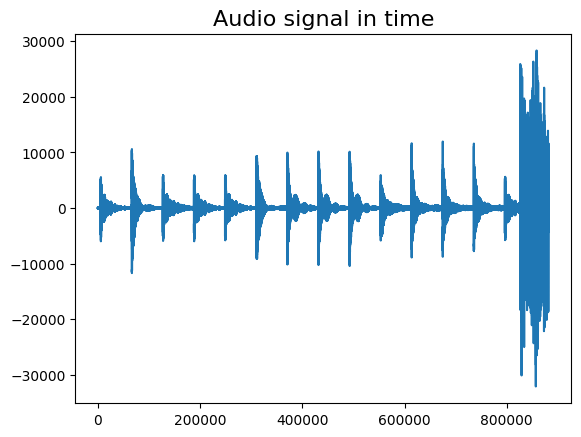

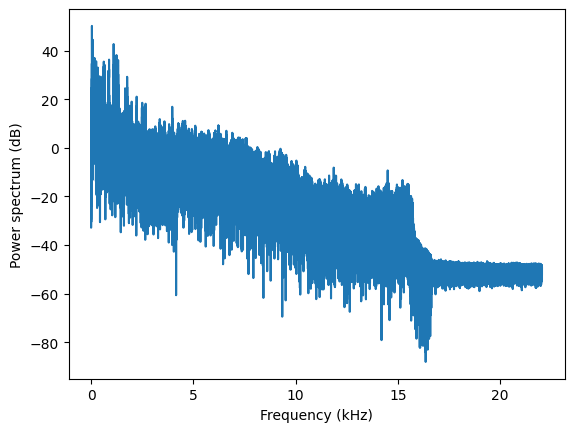

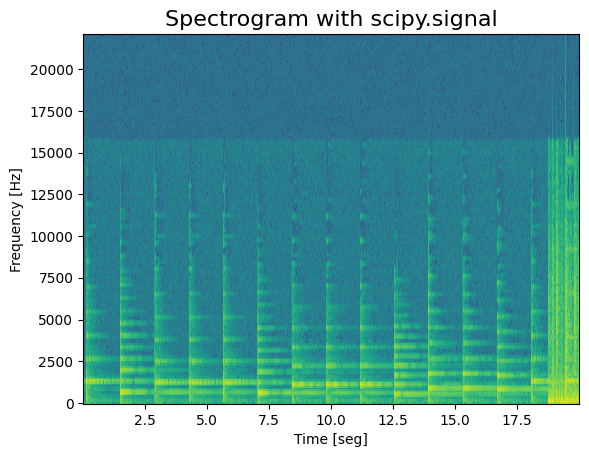

In [38]:

# Plot the audio signal in time
import matplotlib.pyplot as plt
plt.plot(audio)
plt.title('Audio signal in time',size=16)

In [53]:
np.argpartition(fft_result, -5)

array([350553, 440999, 881970, ...,    824, 881176, 881177])

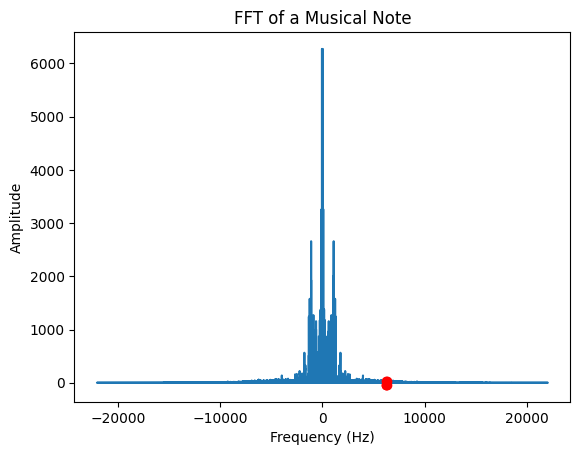

In [55]:
# Applying FFT
fft_result = np.fft.fft(audio)
fft_result = np.abs(fft_result)

duration = audio.shape[0] / rate
t = np.linspace(0, duration, int(rate * duration), endpoint=False)
freq = np.fft.fftfreq(t.shape[-1], d=1/rate)


ind = np.argpartition(fft_result, -5)[-5:]
top5 = fft_result[ind]
top5freq = freq[ind]
# Plotting the spectrum
plt.plot(freq, fft_result)
plt.title('FFT of a Musical Note')

# Top 5 notas mais presentes
plt.plot(top5freq[0], top5[0],'ro') 
plt.plot(top5freq[1], top5[1],'ro') 
plt.plot(top5freq[2], top5[2],'ro') 
plt.plot(top5freq[3], top5[3],'ro') 
plt.plot(top5freq[4], top5[4],'ro') 

plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

In [51]:
def extract_peak_frequency(data, sampling_rate):
    fft_data = np.fft.fft(data)
    freqs = np.fft.fftfreq(len(data))
    
    peak_coefficient = np.argmax(np.abs(fft_data))
    peak_freq = freqs[peak_coefficient]
    
    return abs(peak_freq * sampling_rate)

extract_peak_frequency(audio, rate)

41.15

[7.53238366e-27 1.50257850e+00 2.31105685e+00 ... 2.09416859e-04
 1.03532846e-04 1.27163483e-04]


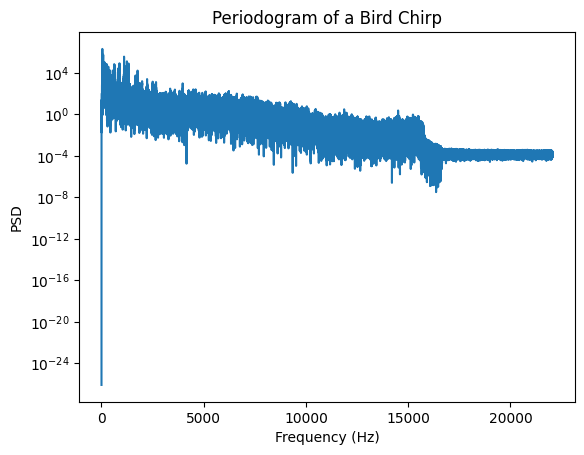

In [37]:
from scipy.signal import periodogram

# Calculating the periodogram
frequencies, powers = periodogram(audio, rate)

print(powers)
# Plotting the periodogram
plt.semilogy(frequencies, powers)
plt.title('Periodogram of a Bird Chirp')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')
plt.show()

## Áudio Original

In [8]:
ipd.Audio(normalize(audio).T, rate=rate, autoplay=True) # load a NumPy array

44100
